In [1]:
import pandas as pd
import numpy as np

In [2]:
file = "online-retail-dataset.csv"
df = pd.read_csv(file)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df["InvoiceDate"]

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 541909, dtype: object

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df["Description"][0]

'WHITE HANGING HEART T-LIGHT HOLDER'

In [8]:
df["Description"].fillna("unknown",inplace=True)

In [9]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
df["CustomerID"].mean()

15287.690570239585

In [13]:
df.dropna(subset=["CustomerID"],inplace=True)

In [14]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
# converting the datetime format with month,year
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df['Date'] = df['InvoiceDate'].dt.date
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour


In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Weekday,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010,12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010,12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,Wednesday,8


In [18]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [19]:
# Negative quantities might represent returns or cancellations
returns = df[df["Quantity"]<0]
df = df[df["Quantity"]>=0]

In [24]:
df.drop_duplicates(inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_10344\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Weekday,Hour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010,12,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010,12,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,Wednesday,8,20.34


In [26]:
# visualization part 
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(5)
print(top_products)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
Name: Quantity, dtype: int64


In [27]:
#revenue by country
country_revenue = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
print(country_revenue)

Country
United Kingdom          7285024.644
Netherlands              285446.340
EIRE                     265262.460
Germany                  228678.400
France                   208934.310
Australia                138453.810
Spain                     61558.560
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33375.840
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13502.850
Austria                   10198.680
Poland                     7334.650
Israel                     7215.840
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

In [28]:
# return analysis 
total_returns = returns["TotalPrice"].sum()
print(f"Total values of returns: {total_returns}")

Total values of returns: -611342.0900000001


C:\Users\Acer\AppData\Local\Temp\ipykernel_10344\743928601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')


<Axes: title={'center': 'Monthly Revenue'}, xlabel='YearMonth'>

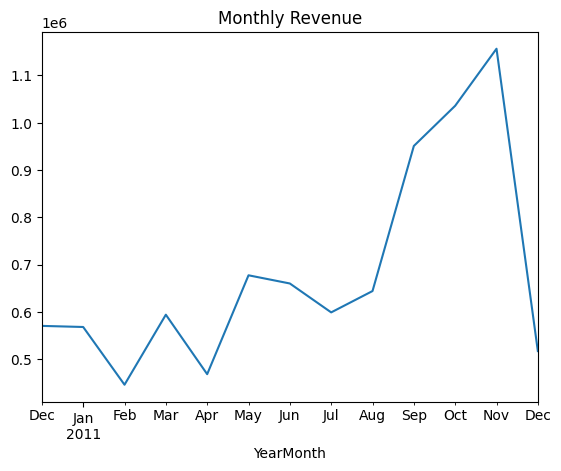

In [29]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('YearMonth')['TotalPrice'].sum()
monthly_revenue.plot(kind='line', title='Monthly Revenue')

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Sales by Weekend'}, xlabel='Weekday'>

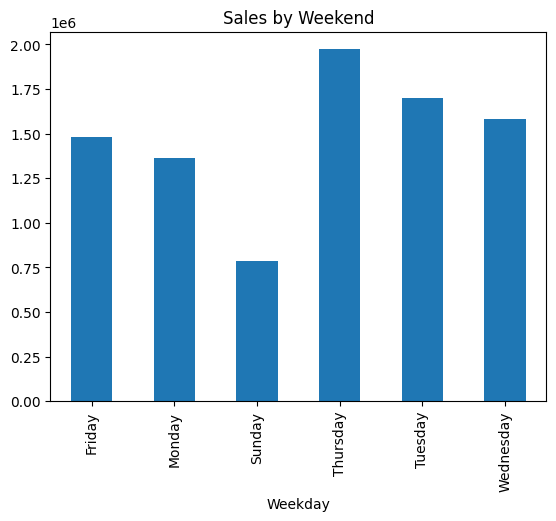

In [31]:
weekday_sales = df.groupby("Weekday")["TotalPrice"].sum()
weekday_sales.plot(kind="bar",title="Sales by Weekend")

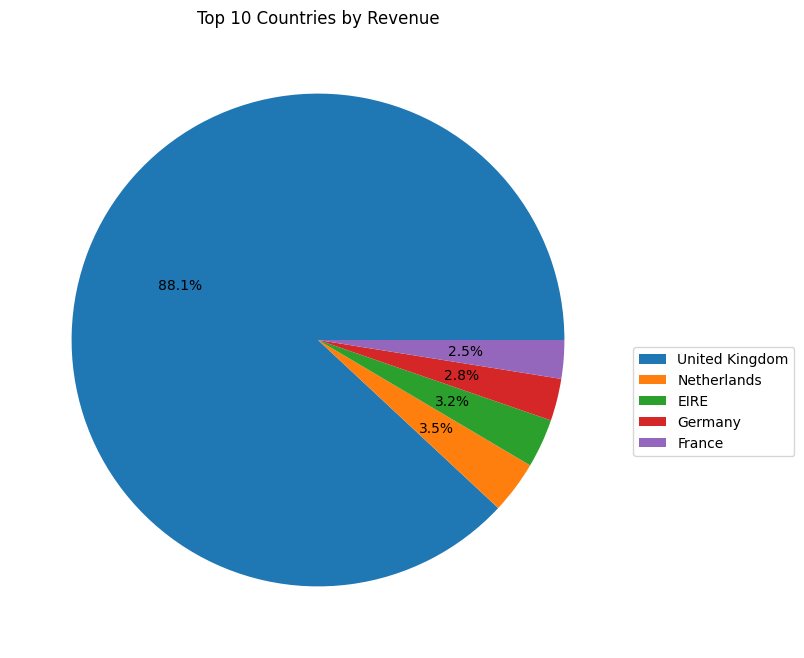

In [43]:
# top countires by revenue 
top_countires = country_revenue.head(5)
plt.figure(figsize=(8, 8))
top_countires.plot(kind="pie", title="Top 5 Countries by Revenue", labels=None, autopct='%1.1f%%')  # Remove labels
plt.legend(top_countires.index, loc="best", bbox_to_anchor=(1, 0.5))  # Add a legend outside the chart
plt.ylabel('')
plt.show()


<Axes: title={'center': 'the monthly purchase'}, xlabel='Year,Month'>

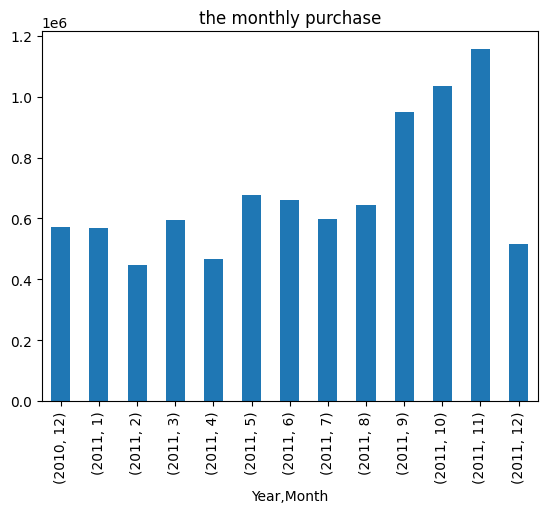

In [37]:
monthly_sales = df.groupby(['Year', 'Month'])['TotalPrice'].sum()
monthly_sales.plot(kind="bar",title="the monthly purchase")

<Axes: title={'center': 'hourly sales of the day'}, ylabel='TotalPrice'>

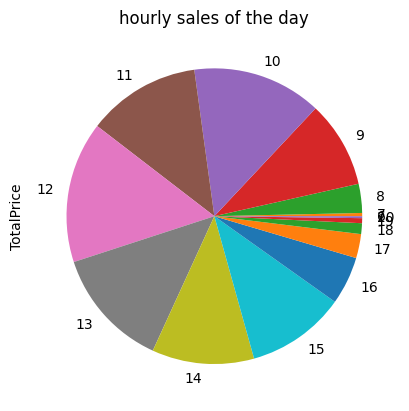

In [38]:
hourly_sales = df.groupby('Hour')['TotalPrice'].sum()
hourly_sales.plot(kind="pie",title="hourly sales of the day")